First importing packages and data, as well as the gaussian we'll use to fit the peaks

In [1]:
import numpy as np
from scipy.optimize import curve_fit
import scipy.signal
import scipy.stats
import matplotlib.pyplot as plt
import mplhep
import pandas as pd

na_df = pd.read_csv('22Na.csv', skiprows=21)
co_df = pd.read_csv('60Co.csv', skiprows=21)
cs_df = pd.read_csv('137Cs.csv', skiprows=21)
bkg_df = pd.read_csv('bkg.csv', skiprows=21)

channels = na_df['Channel'].to_numpy()      # Only need this once as they're the same for each
na_counts = na_df['Counts'].to_numpy()
co_counts = co_df['Counts'].to_numpy()
cs_counts = cs_df['Counts'].to_numpy()
bkg_counts = bkg_df['Counts'].to_numpy()

na_counts -= bkg_counts
co_counts -= bkg_counts
cs_counts -= bkg_counts

na_counts = na_counts / 1200
co_counts = co_counts / 1200
cs_counts = cs_counts / 1200


def gaussian(x, mu, sigma, A):
    return (A*(1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(1/2)*((x-mu)/sigma)**2))

Now histogram each and fit curves to each section, brute force method yay. Don't forget to subtract bkg data

Fit: 0
Mu: 18.817178168457055
Sigma: 3.0984618404868147
Amplitude: 0.06021474862787975
Chi Squared per dof: 1.0195430010042413e-06

Fit: 1
Mu: 48.95585437004794
Sigma: 10.272153500655744
Amplitude: 1.1594555105142252
Chi Squared per dof: 0.00010780205022157436

Fit: 2
Mu: 87.1698856953049
Sigma: 41.533943808153005
Amplitude: 4.012355329782384
Chi Squared per dof: 3.907202352114013e-05

Fit: 3
Mu: 114.38769091408521
Sigma: 13.025954799428757
Amplitude: 2.810431126540541
Chi Squared per dof: 0.0002049667172713061

Fit: 4
Mu: -475.76406488371964
Sigma: 303.7186671413847
Amplitude: 46.77175598973557
Chi Squared per dof: 8.610552946642247e-06

Fit: 5
Mu: 178.3017960683723
Sigma: 37.4480405693221
Amplitude: 0.537416930825891
Chi Squared per dof: 6.781437685425698e-06

Fit: 6
Mu: 229.1791076707013
Sigma: 13.509127540420417
Amplitude: 0.1521876407400105
Chi Squared per dof: 3.0837959554729085e-06

Fit: 7
Mu: 275.1427576104572
Sigma: 43.648512033552215
Amplitude: 0.5017914924765127
Chi Squared 

/home/mkidson/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_43783/2751455544.py:29: RuntimeWarning: divide by zero encountered in double_scalars
  print(f'Fit: {p}\nMu: {popt[0]}\nSigma: {popt[1]}\nAmplitude: {popt[2]}\nChi Squared per dof: {chi_sq/dof}\n')


Fit: 31
Mu: 2067.3396257969866
Sigma: 15.605897229232387
Amplitude: 37.519206774788955
Chi Squared per dof: -7.639615397635462e-12

Fit: 32
Mu: 2047.009910013679
Sigma: 9.698610259553089
Amplitude: 6.331645161369208
Chi Squared per dof: 0.00040699242782236066

Fit: 33
Mu: 2069.676935746597
Sigma: 46.494385501720245
Amplitude: 30.334762215661275
Chi Squared per dof: 0.0003416664051018507

Fit: 34
Mu: 2109.5924076406272
Sigma: 96.09345178143855
Amplitude: 63.4107592192991
Chi Squared per dof: 0.00023803930464746844

Fit: 35
Mu: 2125.251469811882
Sigma: 2.626016301052162
Amplitude: 1.8680869249886165
Chi Squared per dof: inf

Fit: 36
Mu: 2145.8097624582947
Sigma: 51.72814047295643
Amplitude: 34.29327020707917
Chi Squared per dof: 0.0002713020150446798

Fit: 37
Mu: 2185.5974221198726
Sigma: 82.11660212530008
Amplitude: 55.19850969674814
Chi Squared per dof: 0.000288206031408332

Fit: 38
Mu: 2226.9584788775855
Sigma: 50.58443164516228
Amplitude: 35.39404493075323
Chi Squared per dof: 0.0002

/tmp/ipykernel_43783/2751455544.py:64: RuntimeWarning: divide by zero encountered in double_scalars
  print(f'Fit: {p}\nMu: {popt[0]}\nSigma: {popt[1]}\nAmplitude: {popt[2]}\nChi Squared per dof: {chi_sq/dof}\n')


Fit: 38
Mu: 1655.5571478077038
Sigma: 34.048542363556635
Amplitude: 36.291352931419624
Chi Squared per dof: 0.0007329546694891755

Fit: 39
Mu: 1693.4601567915056
Sigma: 16.10079552231209
Amplitude: 107.31682212649761
Chi Squared per dof: -5.921260071801452e-13

Fit: 40
Mu: 1676.904081474316
Sigma: 38.700181654343275
Amplitude: 41.5590721422988
Chi Squared per dof: 0.0002981916303661778

Fit: 41
Mu: 1692.9324676988049
Sigma: 23.17365667934882
Amplitude: 24.991888928499986
Chi Squared per dof: 0.00047988453894908797

Fit: 42
Mu: 1760.328638037308
Sigma: 157.2559178153724
Amplitude: 176.4184982942914
Chi Squared per dof: 0.0003739045748962683

Fit: 43
Mu: 1783.605284692001
Sigma: 47.3121310843856
Amplitude: 53.76972941180771
Chi Squared per dof: 0.0004476115028419088

Fit: 44
Mu: 1823.9213068245876
Sigma: 103.8106853437526
Amplitude: 120.56317605795373
Chi Squared per dof: 0.0004354138901474714

Fit: 45
Mu: 1884.6960227529112
Sigma: 126.95134000773243
Amplitude: 155.1914552827579
Chi Squa

/tmp/ipykernel_43783/2751455544.py:98: RuntimeWarning: divide by zero encountered in double_scalars
  print(f'Fit: {p}\nMu: {popt[0]}\nSigma: {popt[1]}\nAmplitude: {popt[2]}\nChi Squared per dof: {chi_sq/dof}\n')


Optimal parameters not found: The maximum number of function evaluations is exceeded.
Fit: 12
Mu: 814.6875028735419
Sigma: 49.09022168485053
Amplitude: 92.45230769445311
Chi Squared per dof: 0.0006174053849334663

Fit: 13
Mu: 847.3808577814219
Sigma: 119.82912521716663
Amplitude: 214.44114627030808
Chi Squared per dof: 0.0005548522163298082

Fit: 14
Mu: -206.54066576025147
Sigma: 1134.7966433090264
Amplitude: 3157.000325132794
Chi Squared per dof: 0.001342847369898076

Fit: 15
Mu: 896.1974838569356
Sigma: 3.1049171427642603
Amplitude: 5.6800032841903905
Chi Squared per dof: inf

Fit: 16
Mu: 911.8844384267886
Sigma: 73.67314478445165
Amplitude: 128.42786628437824
Chi Squared per dof: 0.0005133828729862533

Fit: 17
Mu: 981.721134875978
Sigma: 135.91960646322104
Amplitude: 243.17037059776723
Chi Squared per dof: 0.000540666898948528

Fit: 18
Mu: 996.3627714212714
Sigma: 84.01800344697254
Amplitude: 152.87938657777016
Chi Squared per dof: 0.0005519405963788925

Fit: 19
Mu: 907.223546386048

/home/mkidson/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:864: RuntimeWarning: divide by zero encountered in divide
  pcov = np.dot(VT.T / s**2, VT)


Fit: 39
Mu: 2321.0773034880303
Sigma: 0.6087604764407526
Amplitude: 0.01925640653173069
Chi Squared per dof: 1.5071467524500973e-05

Fit: 40
Mu: 2357.59489316478
Sigma: 3.8514247905343857
Amplitude: 0.026556282127775412
Chi Squared per dof: 2.7622420389046803e-05

Fit: 41
Mu: 2406.437634327002
Sigma: 11.161945740109594
Amplitude: 0.08787770927388758
Chi Squared per dof: 1.9018372460541277e-05

Fit: 42
Mu: 2541.361192368364
Sigma: 25.09175064839926
Amplitude: 28.063631437913543
Chi Squared per dof: 1.9194891922054872e-05

Fit: 43
Mu: 2333.806552201132
Sigma: 38.77947687681936
Amplitude: 12.136505344053885
Chi Squared per dof: 1.9668812566656853e-05

Fit: 44
Mu: 2524.3823164465457
Sigma: 4.516473828494104
Amplitude: 0.0706033971481843
Chi Squared per dof: 2.5822951061357965e-05

Fit: 45
Mu: 2564.6482630131263
Sigma: -0.656652336394103
Amplitude: -0.021918960569897505
Chi Squared per dof: 1.672988141044927e-05

Fit: 46
Mu: 2728.285189026871
Sigma: 48.627525998912795
Amplitude: -9.26725263

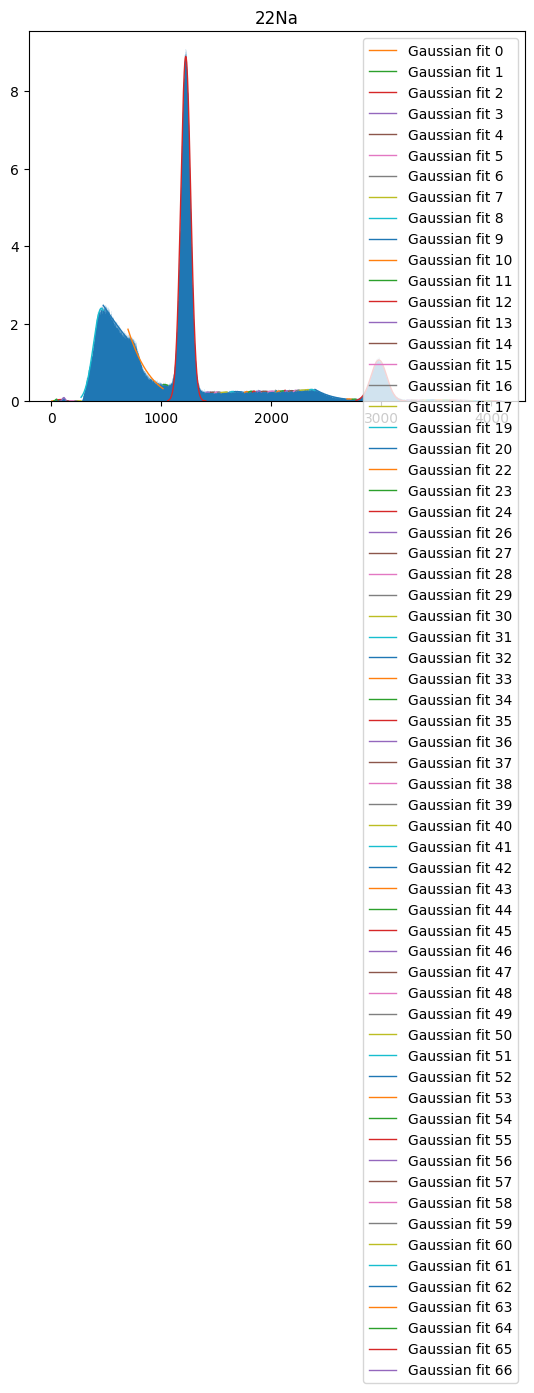

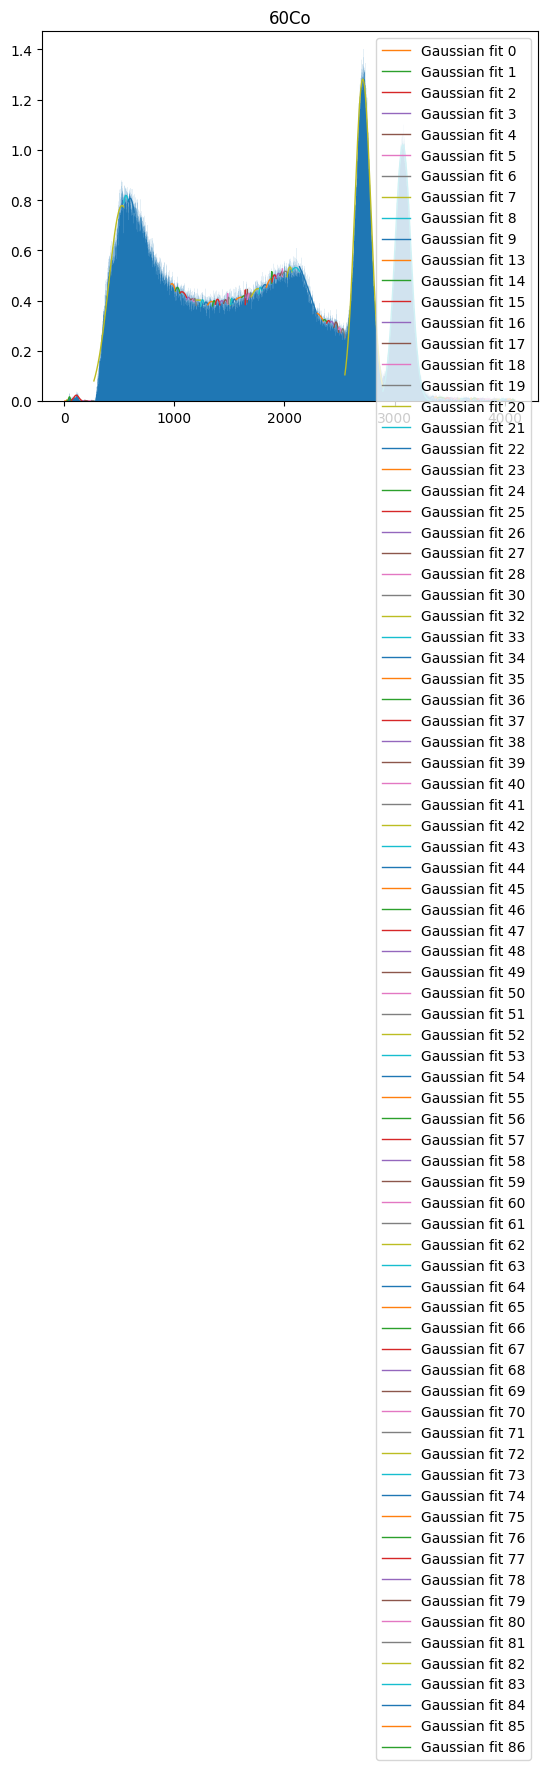

Error in callback <function flush_figures at 0x7f10bba553f0> (for post_execute):


KeyboardInterrupt: 

In [3]:

plt.figure()
mplhep.histplot(na_counts, histtype='fill')
plt.title('22Na')

smoothData = scipy.signal.savgol_filter(na_counts, 51, 5)
smootherData = scipy.signal.savgol_filter(smoothData, 51, 5)
# Finds the minima
minima=scipy.signal.find_peaks(smootherData*-1)[0]

for p in range(len(minima)-1):
    try:
        # Isolates the regions of interest 
        xFit=channels[minima[p]:minima[p+1]]
        yFit=na_counts[minima[p]:minima[p+1]]
        # Need a new N for each region since the size is changing
        newN=len(xFit)
        # Approximates the median to be in the middle of the two endpoint, it's a reasonable guess
        approxCentroid=(minima[p]+minima[p+1])/2
        p0=[approxCentroid,50,1]
        numParams=len(p0)

        popt, pcov = curve_fit(gaussian, xFit, yFit, p0, method='trf')
        # Finding if the fit was poggers or cringe
        toPlot=gaussian(xFit, *popt)
        chi_sq=sum((yFit-toPlot)**2)
        dof = newN-numParams

        # if p==7:
        print(f'Fit: {p}\nMu: {popt[0]}\nSigma: {popt[1]}\nAmplitude: {popt[2]}\nChi Squared per dof: {chi_sq/dof}\n')
        plt.plot(xFit, toPlot, linewidth=1, label=f'Gaussian fit {p}')
    except RuntimeError as identifier:
        print(identifier)
plt.legend(loc='upper right')

print('---------------------------------------')
plt.figure()
mplhep.histplot(co_counts, histtype='fill')
plt.title('60Co')

smoothData = scipy.signal.savgol_filter(co_counts, 51, 5)
smootherData = scipy.signal.savgol_filter(smoothData, 51, 5)
# Finds the minima
minima=scipy.signal.find_peaks(smootherData*-1)[0]

for p in range(len(minima)-1):
    try:
        # Isolates the regions of interest 
        xFit=channels[minima[p]:minima[p+1]]
        yFit=co_counts[minima[p]:minima[p+1]]
        # Need a new N for each region since the size is changing
        newN=len(xFit)
        # Approximates the median to be in the middle of the two endpoint, it's a reasonable guess
        approxCentroid=(minima[p]+minima[p+1])/2
        p0=[approxCentroid,50,1]
        numParams=len(p0)

        popt, pcov = curve_fit(gaussian, xFit, yFit, p0, method='trf')
        # Finding if the fit was poggers or cringe
        toPlot=gaussian(xFit, *popt)
        chi_sq=sum((yFit-toPlot)**2)
        dof = newN-numParams

        # if p==7:
        print(f'Fit: {p}\nMu: {popt[0]}\nSigma: {popt[1]}\nAmplitude: {popt[2]}\nChi Squared per dof: {chi_sq/dof}\n')
        plt.plot(xFit, toPlot, linewidth=1, label=f'Gaussian fit {p}')
    except RuntimeError as identifier:
        print(identifier)
plt.legend(loc='upper right')

plt.figure()
mplhep.histplot(cs_counts, histtype='fill')
plt.title('137Cs')

smoothData = scipy.signal.savgol_filter(cs_counts, 51, 5)
smootherData = scipy.signal.savgol_filter(smoothData, 51, 5)
# Finds the minima
minima=scipy.signal.find_peaks(smootherData*-1)[0]

for p in range(len(minima)-1):
    try:
        # Isolates the regions of interest 
        xFit=channels[minima[p]:minima[p+1]]
        yFit=cs_counts[minima[p]:minima[p+1]]
        # Need a new N for each region since the size is changing
        newN=len(xFit)
        # Approximates the median to be in the middle of the two endpoint, it's a reasonable guess
        approxCentroid=(minima[p]+minima[p+1])/2
        p0=[approxCentroid,50,1]
        numParams=len(p0)

        popt, pcov = curve_fit(gaussian, xFit, yFit, p0, method='trf')
        # Finding if the fit was poggers or cringe
        toPlot=gaussian(xFit, *popt)
        chi_sq=sum((yFit-toPlot)**2)
        dof = newN-numParams

        # if p==7:
        print(f'Fit: {p}\nMu: {popt[0]}\nSigma: {popt[1]}\nAmplitude: {popt[2]}\nChi Squared per dof: {chi_sq/dof}\n')
        plt.plot(xFit, toPlot, linewidth=1, label=f'Gaussian fit {p}')
    except RuntimeError as identifier:
        print(identifier)
plt.legend(loc='upper right')





Na:

Fit: 12
Mu: 1222.716265598273
Sigma: 44.720678994831246
Amplitude: 996.7189907285951
Chi Squared per dof: 0.0357346735760776

Fit: 45
Mu: 2976.9610433251287
Sigma: 71.67772549323004
Amplitude: 190.12374443312748
Chi Squared per dof: 0.0006483616486940997

Co: 

Fit: 62
Mu: 2711.739989376562
Sigma: 72.67858300399595
Amplitude: 233.51307806603205
Chi Squared per dof: 0.00303595706657607

Fit: 63
Mu: 3075.9279002943786
Sigma: 71.4046910618864
Amplitude: 182.5825050675984
Chi Squared per dof: 0.0005480884368201248

Cs:

Fit: 21
Mu: 1554.928992512294
Sigma: 47.71213223495321
Amplitude: 561.2983919204038
Chi Squared per dof: 0.0019635466719972734



Now the calibration by fitting a straight line

In [2]:
mus = np.array([1222.716265598273, 2976.9610433251287, 2711.739989376562, 3075.9279002943786, 1554.928992512294])        # 22Na, 22Na, 60Co, 60Co, 137Cs
sigmas = np.array([44.720678994831246, 71.67772549323004, 72.67858300399595, 71.4046910618864, 47.71213223495321])

energies = np.array([511, 1274.537, 1173.228, 1332.492, 661.657])

def linear(x, m, c):
    return m*x+c

popt, pcov = curve_fit(linear, energies, mus, [1,1], sigma=sigmas, absolute_sigma=True)
stDev = np.sqrt(np.diag(pcov))

print(popt)
print(f'Energy of last bin: {(4096 - popt[1]) / popt[0]}')

[ 2.27306926 56.76252822]
Energy of last bin: 1776.9970936411682


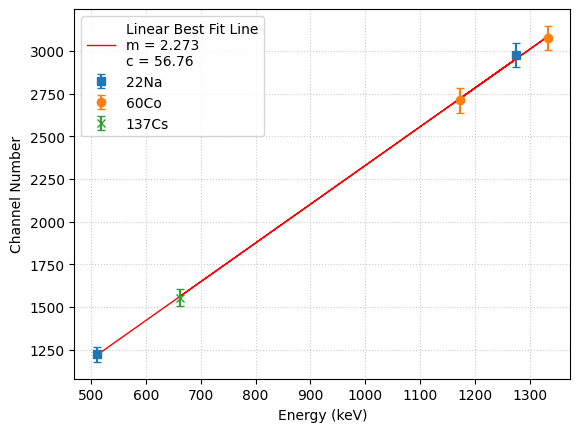

In [17]:
plt.figure()
# plt.scatter(energies, mus)
plt.xlabel('Energy (keV)')
plt.ylabel('Channel Number')
plt.xticks([500,600,700,800,900,1000,1100,1200,1300])
plt.grid(color='#CCCCCC', linestyle=':')
# plt.plot(energies, popt[0]*energies + popt[1], color='orange')
plt.plot(energies, popt[0]*energies + popt[1], 'red', linewidth=1, label=f'Linear Best Fit Line\nm = {popt[0]:.4}\nc = {popt[1]:.4}')
plt.errorbar(energies[:2], mus[:2], sigmas[:2], label='22Na', fmt='s', capsize=3)
plt.errorbar(energies[2:4], mus[2:4], sigmas[2:4], label='60Co', fmt='o', capsize=3)
plt.errorbar(energies[4:], mus[4:], sigmas[4:], label='137Cs', fmt='x', capsize=3)
plt.legend()
plt.savefig('./low_calibration.pdf')



# OLD

Na:

Fit: 10
Mu: 1118.1415869195469
Sigma: 40.57413077385624
Amplitude: 1022.7060898229615
Chi Squared per dof: 0.049092466177234124

Fit: 46
Mu: 2730.7020553542784
Sigma: 66.0308014751715
Amplitude: 194.5636206273008
Chi Squared per dof: 0.0007746455303900983

Co: 

Fit: 38
Mu: 2103.7557511692257
Sigma: 55.64468819960899
Amplitude: 237.22176106435452
Chi Squared per dof: 0.005033616598258906

Fit: 39
Mu: 2385.8961531861987
Sigma: 56.02934068530825
Amplitude: 186.49565483636752
Chi Squared per dof: 0.0009065899268583102

Cs:

Fit: 18
Mu: 1456.7453991883492
Sigma: 46.81855601124992
Amplitude: 561.7689214688577
Chi Squared per dof: 0.0020733116701610174

